<a href="https://www.kaggle.com/code/torukmakto187/pancreatic-cancer-detection?scriptVersionId=158139712" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Load the data
df = pd.read_csv('/kaggle/input/d/torukmakto187/cancer/.csv')
df.head(7)

,Gender,Age,BMI,Smoking History,H/O Drinking,H/O DM,H/O HTN,Hyperlipidemia,H/O Coronary Heart Disease,WBC,...,UA,CEA,CA125,CA199,CA153,CA50,CA724,CA242,FPG,Pancreatic Cancer
0,1,68,22.09,0,0,0,1,1,1,4.34,...,221.0,2.58,19.2,804.00,8.37,399.80,1.50,111.70,5.53,1
1,1,61,22.48,0,1,0,0,0,1,6.42,...,410.0,43.30,292.0,787.00,7.88,6.56,3.89,2.70,5.18,1
2,1,76,23.41,1,0,1,1,0,0,5.69,...,432.1,20.70,18.2,1000.00,12.60,361.50,1.50,186.40,16.80,1
3,0,75,23.73,0,0,1,1,0,1,15.56,...,606.0,1000.00,200.2,1000.00,55.50,500.00,57.70,200.00,19.56,1
4,1,68,24.46,1,1,0,0,0,0,9.17,...,198.0,128.00,269.0,1000.00,102.00,500.00,21.80,200.00,5.07,1
5,1,57,24.91,1,1,0,1,0,0,8.08,...,499.4,2.30,14.1,84.02,11.42,28.06,5.86,32.63,4.50,1
6,0,51,14.76,0,0,1,1,1,0,5.00,...,276.0,2.14,18.5,287.00,20.50,219.60,1.50,19.56,12.62,1


In [3]:
#Count the number of rows and columns in the data set
df.shape

(723, 40)

In [4]:
df.columns

Index(['Gender', 'Age', 'BMI', 'Smoking History', 'H/O Drinking', 'H/O DM',
       'H/O HTN', 'Hyperlipidemia', 'H/O Coronary Heart Disease', 'WBC', 'Hb',
       'NE', 'LY', 'PLT', 'NLR', 'PLR', 'CRP', 'DD', 'Hb1AC', 'Albumin',
       'TBIL', 'DBIL', 'ALT', 'AST', 'GGT', 'ALP', 'TC', 'TG', 'HDL', 'LDL',
       'UA', 'CEA', 'CA125', 'CA199', 'CA153', 'CA50', 'CA724', 'CA242', 'FPG',
       'Pancreatic Cancer'],
      dtype='object')

In [5]:
# List of significant columns from univariate analysis
significant_columns = ['Gender', 'Smoking History', 'H/O DM', 'Hyperlipidemia', 'H/O Drinking', 'BMI', 
                       'Hb', 'NE', 'LY', 'Hb1AC', 'Albumin', 'TBIL', 'DBIL', 'ALT', 'AST', 'GGT', 
                       'ALP', 'UA', 'CEA', 'CA199', 'CA125', 'CA153', 'CA50', 'CA724', 'CA242','Pancreatic Cancer']

# Create a new DataFrame with only the significant columns
df= df[significant_columns]


In [6]:
#Count the empty (NaN, NAN, na) values in each column
df.isna().sum()

Gender               0
Smoking History      0
H/O DM               0
Hyperlipidemia       0
H/O Drinking         0
BMI                  0
Hb                   0
NE                   0
LY                   0
Hb1AC                0
Albumin              0
TBIL                 0
DBIL                 0
ALT                  0
AST                  0
GGT                  0
ALP                  0
UA                   0
CEA                  0
CA199                0
CA125                0
CA153                0
CA50                 0
CA724                0
CA242                0
Pancreatic Cancer    0
dtype: int64

In [7]:
df.columns

Index(['Gender', 'Smoking History', 'H/O DM', 'Hyperlipidemia', 'H/O Drinking',
       'BMI', 'Hb', 'NE', 'LY', 'Hb1AC', 'Albumin', 'TBIL', 'DBIL', 'ALT',
       'AST', 'GGT', 'ALP', 'UA', 'CEA', 'CA199', 'CA125', 'CA153', 'CA50',
       'CA724', 'CA242', 'Pancreatic Cancer'],
      dtype='object')

In [8]:
#Get the new count of the number of rows and cols
df.shape

(723, 26)

In [9]:
#Load the data after deleting misiing values

df.head(n=5).iloc[:, :26]

,Gender,Smoking History,H/O DM,Hyperlipidemia,H/O Drinking,BMI,Hb,NE,LY,Hb1AC,...,ALP,UA,CEA,CA199,CA125,CA153,CA50,CA724,CA242,Pancreatic Cancer
0,1,0,0,1,0,22.09,117.0,2.65,1.20,6.17,...,69.5,221.0,2.58,804.0,19.2,8.37,399.80,1.50,111.7,1
1,1,0,0,0,1,22.48,124.0,4.08,1.54,6.00,...,101.2,410.0,43.30,787.0,292.0,7.88,6.56,3.89,2.7,1
2,1,1,1,0,0,23.41,132.0,4.50,0.78,13.10,...,118.7,432.1,20.70,1000.0,18.2,12.60,361.50,1.50,186.4,1
3,0,0,1,0,0,23.73,115.0,13.93,0.59,13.28,...,607.8,606.0,1000.00,1000.0,200.2,55.50,500.00,57.70,200.0,1
4,1,1,0,0,1,24.46,126.0,6.93,1.35,6.61,...,95.3,198.0,128.00,1000.0,269.0,102.00,500.00,21.80,200.0,1


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,723.0,0.518672,0.499997,0.00,0.0000,1.00,1.000,1.00
Smoking History,723.0,0.224066,0.417255,0.00,0.0000,0.00,0.000,1.00
H/O DM,723.0,0.327801,0.469737,0.00,0.0000,0.00,1.000,1.00
Hyperlipidemia,723.0,0.233748,0.423507,0.00,0.0000,0.00,0.000,1.00
H/O Drinking,723.0,0.218534,0.413538,0.00,0.0000,0.00,0.000,1.00
BMI,723.0,22.901259,3.473018,13.98,20.7000,22.77,24.800,35.16
Hb,723.0,125.039751,21.702172,11.00,114.0000,127.00,138.500,197.00
NE,723.0,4.996266,2.932268,0.96,3.2550,4.28,5.855,29.75
LY,723.0,1.461674,0.595961,0.04,1.0300,1.40,1.830,3.56
Hb1AC,723.0,6.703610,1.814783,4.20,5.6350,6.06,6.935,16.50


In [11]:
df.info

<bound method DataFrame.info of      Gender  Smoking History  H/O DM  Hyperlipidemia  H/O Drinking    BMI  \
0         1                0       0               1             0  22.09   
1         1                0       0               0             1  22.48   
2         1                1       1               0             0  23.41   
3         0                0       1               0             0  23.73   
4         1                1       0               0             1  24.46   
..      ...              ...     ...             ...           ...    ...   
718       1                1       0               0             1  22.49   
719       0                0       1               0             1  22.06   
720       0                0       0               0             0  33.46   
721       0                0       0               0             0  21.80   
722       0                0       0               0             0  22.64   

        Hb     NE    LY  Hb1AC  ...    ALP 

In [12]:
#Get a count of the number of different cancer stages
df['Pancreatic Cancer'].value_counts()

0    370
1    353
Name: Pancreatic Cancer, dtype: int64

<Axes: >

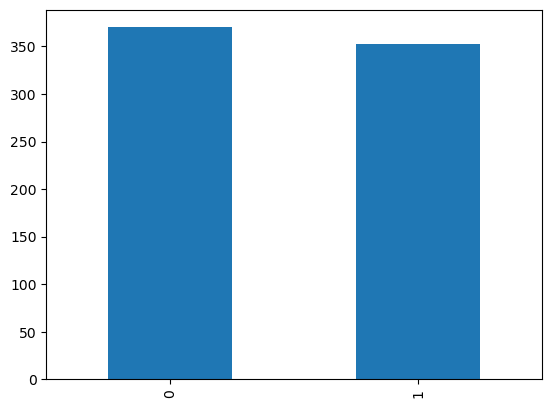

In [13]:
#plot bar chart
df['Pancreatic Cancer'].value_counts().plot.bar()

In [14]:
#check column index
df.columns.tolist().index('Pancreatic Cancer')

25

In [15]:
df.dtypes

Gender                 int64
Smoking History        int64
H/O DM                 int64
Hyperlipidemia         int64
H/O Drinking           int64
BMI                  float64
Hb                   float64
NE                   float64
LY                   float64
Hb1AC                float64
Albumin              float64
TBIL                 float64
DBIL                 float64
ALT                  float64
AST                  float64
GGT                  float64
ALP                  float64
UA                   float64
CEA                  float64
CA199                float64
CA125                float64
CA153                float64
CA50                 float64
CA724                float64
CA242                float64
Pancreatic Cancer      int64
dtype: object

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Iterate over each column in the DataFrame
for column in df.columns:
    # Check if the column has an object data type
    if df[column].dtype == 'object':
        # Create an instance of LabelEncoder
        labelencoder = LabelEncoder()
        
        # Encode the object data in the column
        df[column] = labelencoder.fit_transform(df[column].values)

# Print the updated DataFrame
print(df)

     Gender  Smoking History  H/O DM  Hyperlipidemia  H/O Drinking    BMI  \
0         1                0       0               1             0  22.09   
1         1                0       0               0             1  22.48   
2         1                1       1               0             0  23.41   
3         0                0       1               0             0  23.73   
4         1                1       0               0             1  24.46   
..      ...              ...     ...             ...           ...    ...   
718       1                1       0               0             1  22.49   
719       0                0       1               0             1  22.06   
720       0                0       0               0             0  33.46   
721       0                0       0               0             0  21.80   
722       0                0       0               0             0  22.64   

        Hb     NE    LY  Hb1AC  ...    ALP     UA      CEA    CA199   CA125

In [17]:
#Get the correlation of the columns
df.corr()


,Gender,Smoking History,H/O DM,Hyperlipidemia,H/O Drinking,BMI,Hb,NE,LY,Hb1AC,...,ALP,UA,CEA,CA199,CA125,CA153,CA50,CA724,CA242,Pancreatic Cancer
Gender,1.000000,0.364973,0.029926,0.061120,0.301768,0.014427,0.225419,0.076946,-0.017745,0.100005,...,-0.006316,0.116186,0.101866,0.120884,0.088894,0.048511,0.119525,0.061797,0.125265,0.149018
Smoking History,0.364973,1.000000,0.069932,0.095096,0.518516,-0.000835,0.126884,0.047607,0.069506,0.065930,...,-0.010334,0.030666,-0.029126,0.070028,-0.027409,-0.032480,0.086958,0.004894,0.072538,0.125452
H/O DM,0.029926,0.069932,1.000000,0.233942,0.015739,-0.023091,-0.053316,0.042309,-0.073900,0.564458,...,0.131322,-0.058322,0.146924,0.204844,0.070208,0.062720,0.197884,0.028758,0.189979,0.225684
Hyperlipidemia,0.061120,0.095096,0.233942,1.000000,0.119162,0.080500,-0.046522,0.000793,-0.084031,0.091961,...,0.142011,0.011435,0.073865,0.082109,0.042510,0.028049,0.127254,0.054775,0.110826,0.238555
H/O Drinking,0.301768,0.518516,0.015739,0.119162,1.000000,0.001506,0.084149,-0.010120,0.027232,0.006588,...,0.003632,0.067431,-0.016895,0.025284,-0.030836,-0.031122,0.042557,-0.054997,0.036922,0.079395
BMI,0.014427,-0.000835,-0.023091,0.080500,0.001506,1.000000,0.263138,0.009781,0.205020,-0.025821,...,-0.161560,0.258809,-0.056595,-0.133444,-0.014822,-0.063881,-0.147316,-0.064882,-0.104502,-0.218256
Hb,0.225419,0.126884,-0.053316,-0.046522,0.084149,0.263138,1.000000,-0.118010,0.287410,0.027153,...,-0.223570,0.168557,-0.051906,-0.118337,-0.131957,-0.110522,-0.133816,-0.085050,-0.137724,-0.221185
NE,0.076946,0.047607,0.042309,0.000793,-0.010120,0.009781,-0.118010,1.000000,-0.112346,0.094872,...,0.148684,-0.034205,0.139518,0.076964,0.232613,0.219135,0.128621,0.047720,0.140033,0.066845
LY,-0.017745,0.069506,-0.073900,-0.084031,0.027232,0.205020,0.287410,-0.112346,1.000000,-0.041234,...,-0.247481,0.173252,-0.110432,-0.063438,-0.140596,-0.141485,-0.183432,-0.136960,-0.174631,-0.207548
Hb1AC,0.100005,0.065930,0.564458,0.091961,0.006588,-0.025821,0.027153,0.094872,-0.041234,1.000000,...,0.060977,-0.071538,0.148976,0.158952,0.002646,0.047700,0.247400,0.022041,0.215498,0.272953


In [18]:
corr_matrix = df.corr()
max_corr_columns = corr_matrix.idxmax()

print(max_corr_columns)



Gender                          Gender
Smoking History        Smoking History
H/O DM                          H/O DM
Hyperlipidemia          Hyperlipidemia
H/O Drinking              H/O Drinking
BMI                                BMI
Hb                                  Hb
NE                                  NE
LY                                  LY
Hb1AC                            Hb1AC
Albumin                        Albumin
TBIL                              TBIL
DBIL                              DBIL
ALT                                ALT
AST                                AST
GGT                                GGT
ALP                                ALP
UA                                  UA
CEA                                CEA
CA199                            CA199
CA125                            CA125
CA153                            CA153
CA50                              CA50
CA724                            CA724
CA242                            CA242
Pancreatic Cancer    Panc

In [19]:
np.fill_diagonal(corr_matrix.values, np.nan)
max_corr_columns = corr_matrix.idxmax()
print(max_corr_columns)

Gender                 Smoking History
Smoking History           H/O Drinking
H/O DM                           Hb1AC
Hyperlipidemia       Pancreatic Cancer
H/O Drinking           Smoking History
BMI                                 Hb
Hb                             Albumin
NE                               CA125
LY                                  Hb
Hb1AC                           H/O DM
Albumin                             Hb
TBIL                              DBIL
DBIL                              TBIL
ALT                                AST
AST                                ALT
GGT                                ALP
ALP                                GGT
UA                                 BMI
CEA                              CA153
CA199                             CA50
CA125                            CA153
CA153                            CA125
CA50                             CA242
CA724                            CA153
CA242                             CA50
Pancreatic Cancer        

<Axes: >

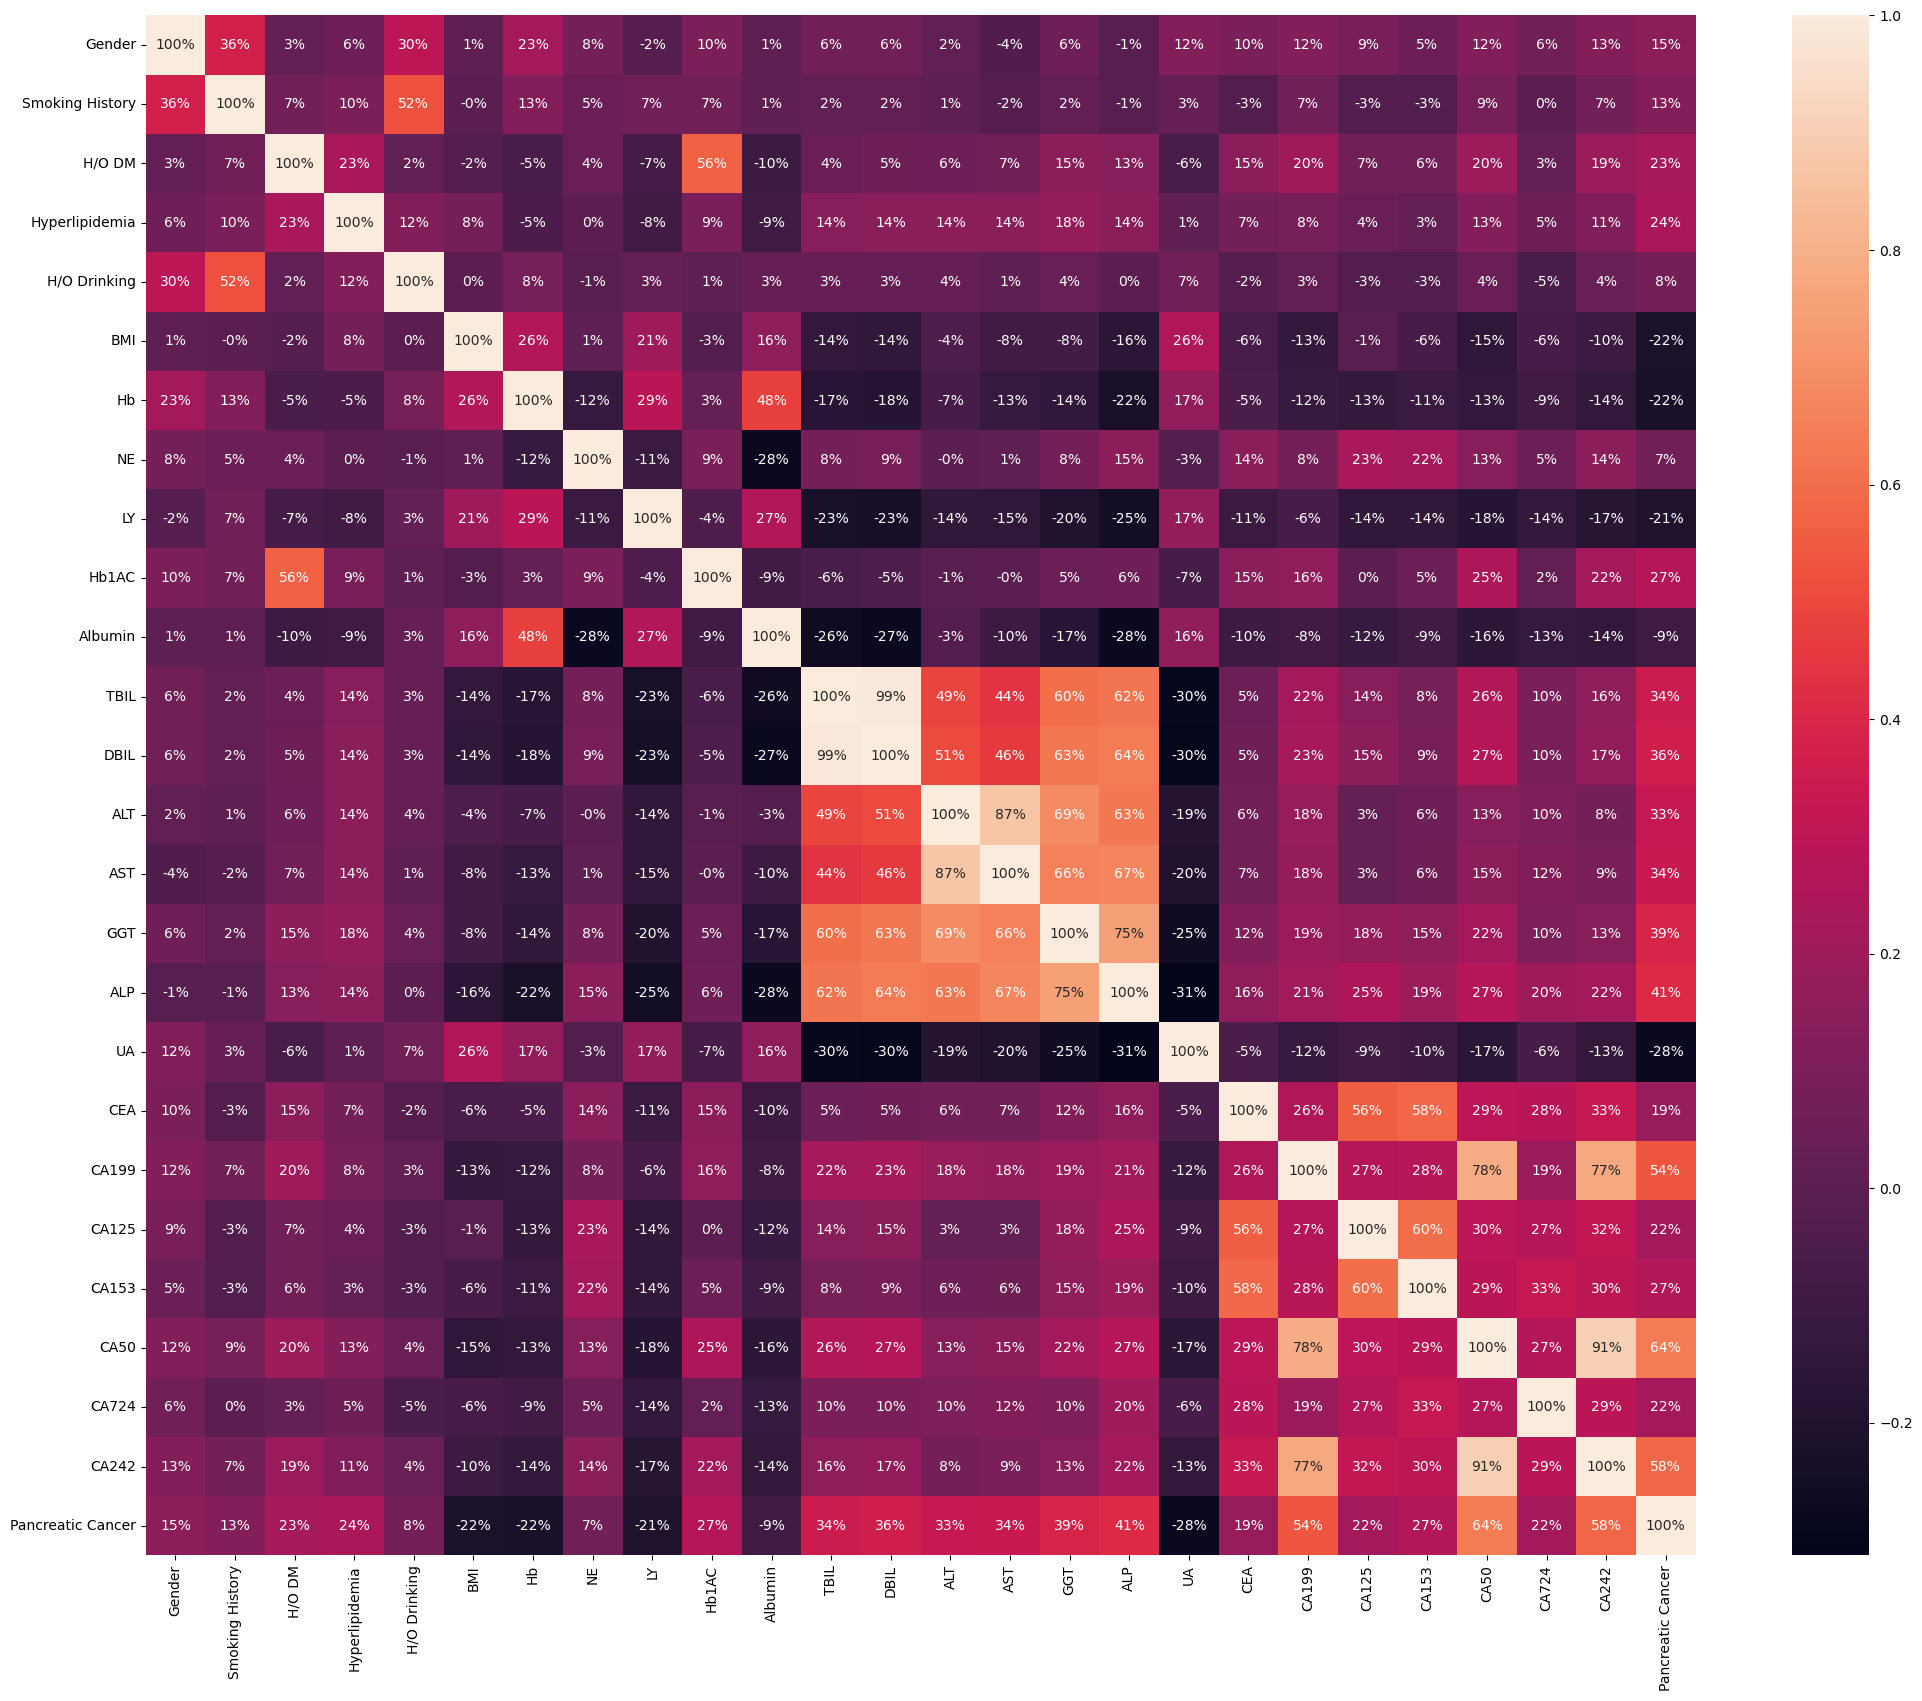

In [20]:
#Visualize the correlation
#NOTE: To see the numbers within the cell ==> 
plt.rcParams['font.family'] = 'AR PL UKai CN'  # Replace with the name of the installed Chinese font
plt.figure(figsize=(25,20))
#sns.heatmap(df.corr(), annot=True).set_xticklabels(hm.get_xticklabels(), fontproperties='SimSun', fontsize=10)
sns.heatmap(df.corr(), annot=True, fmt='.0%')
#plt.figure(figsize=(10,10)) #This is used to change the size of the figure/ heatmap
#sns.heatmap(df.iloc[:,1:5].corr(), annot=True, fmt='.0%') #Get a heap map of 11 columns, index 1-11, note index 0 is just the id column and is left out.


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


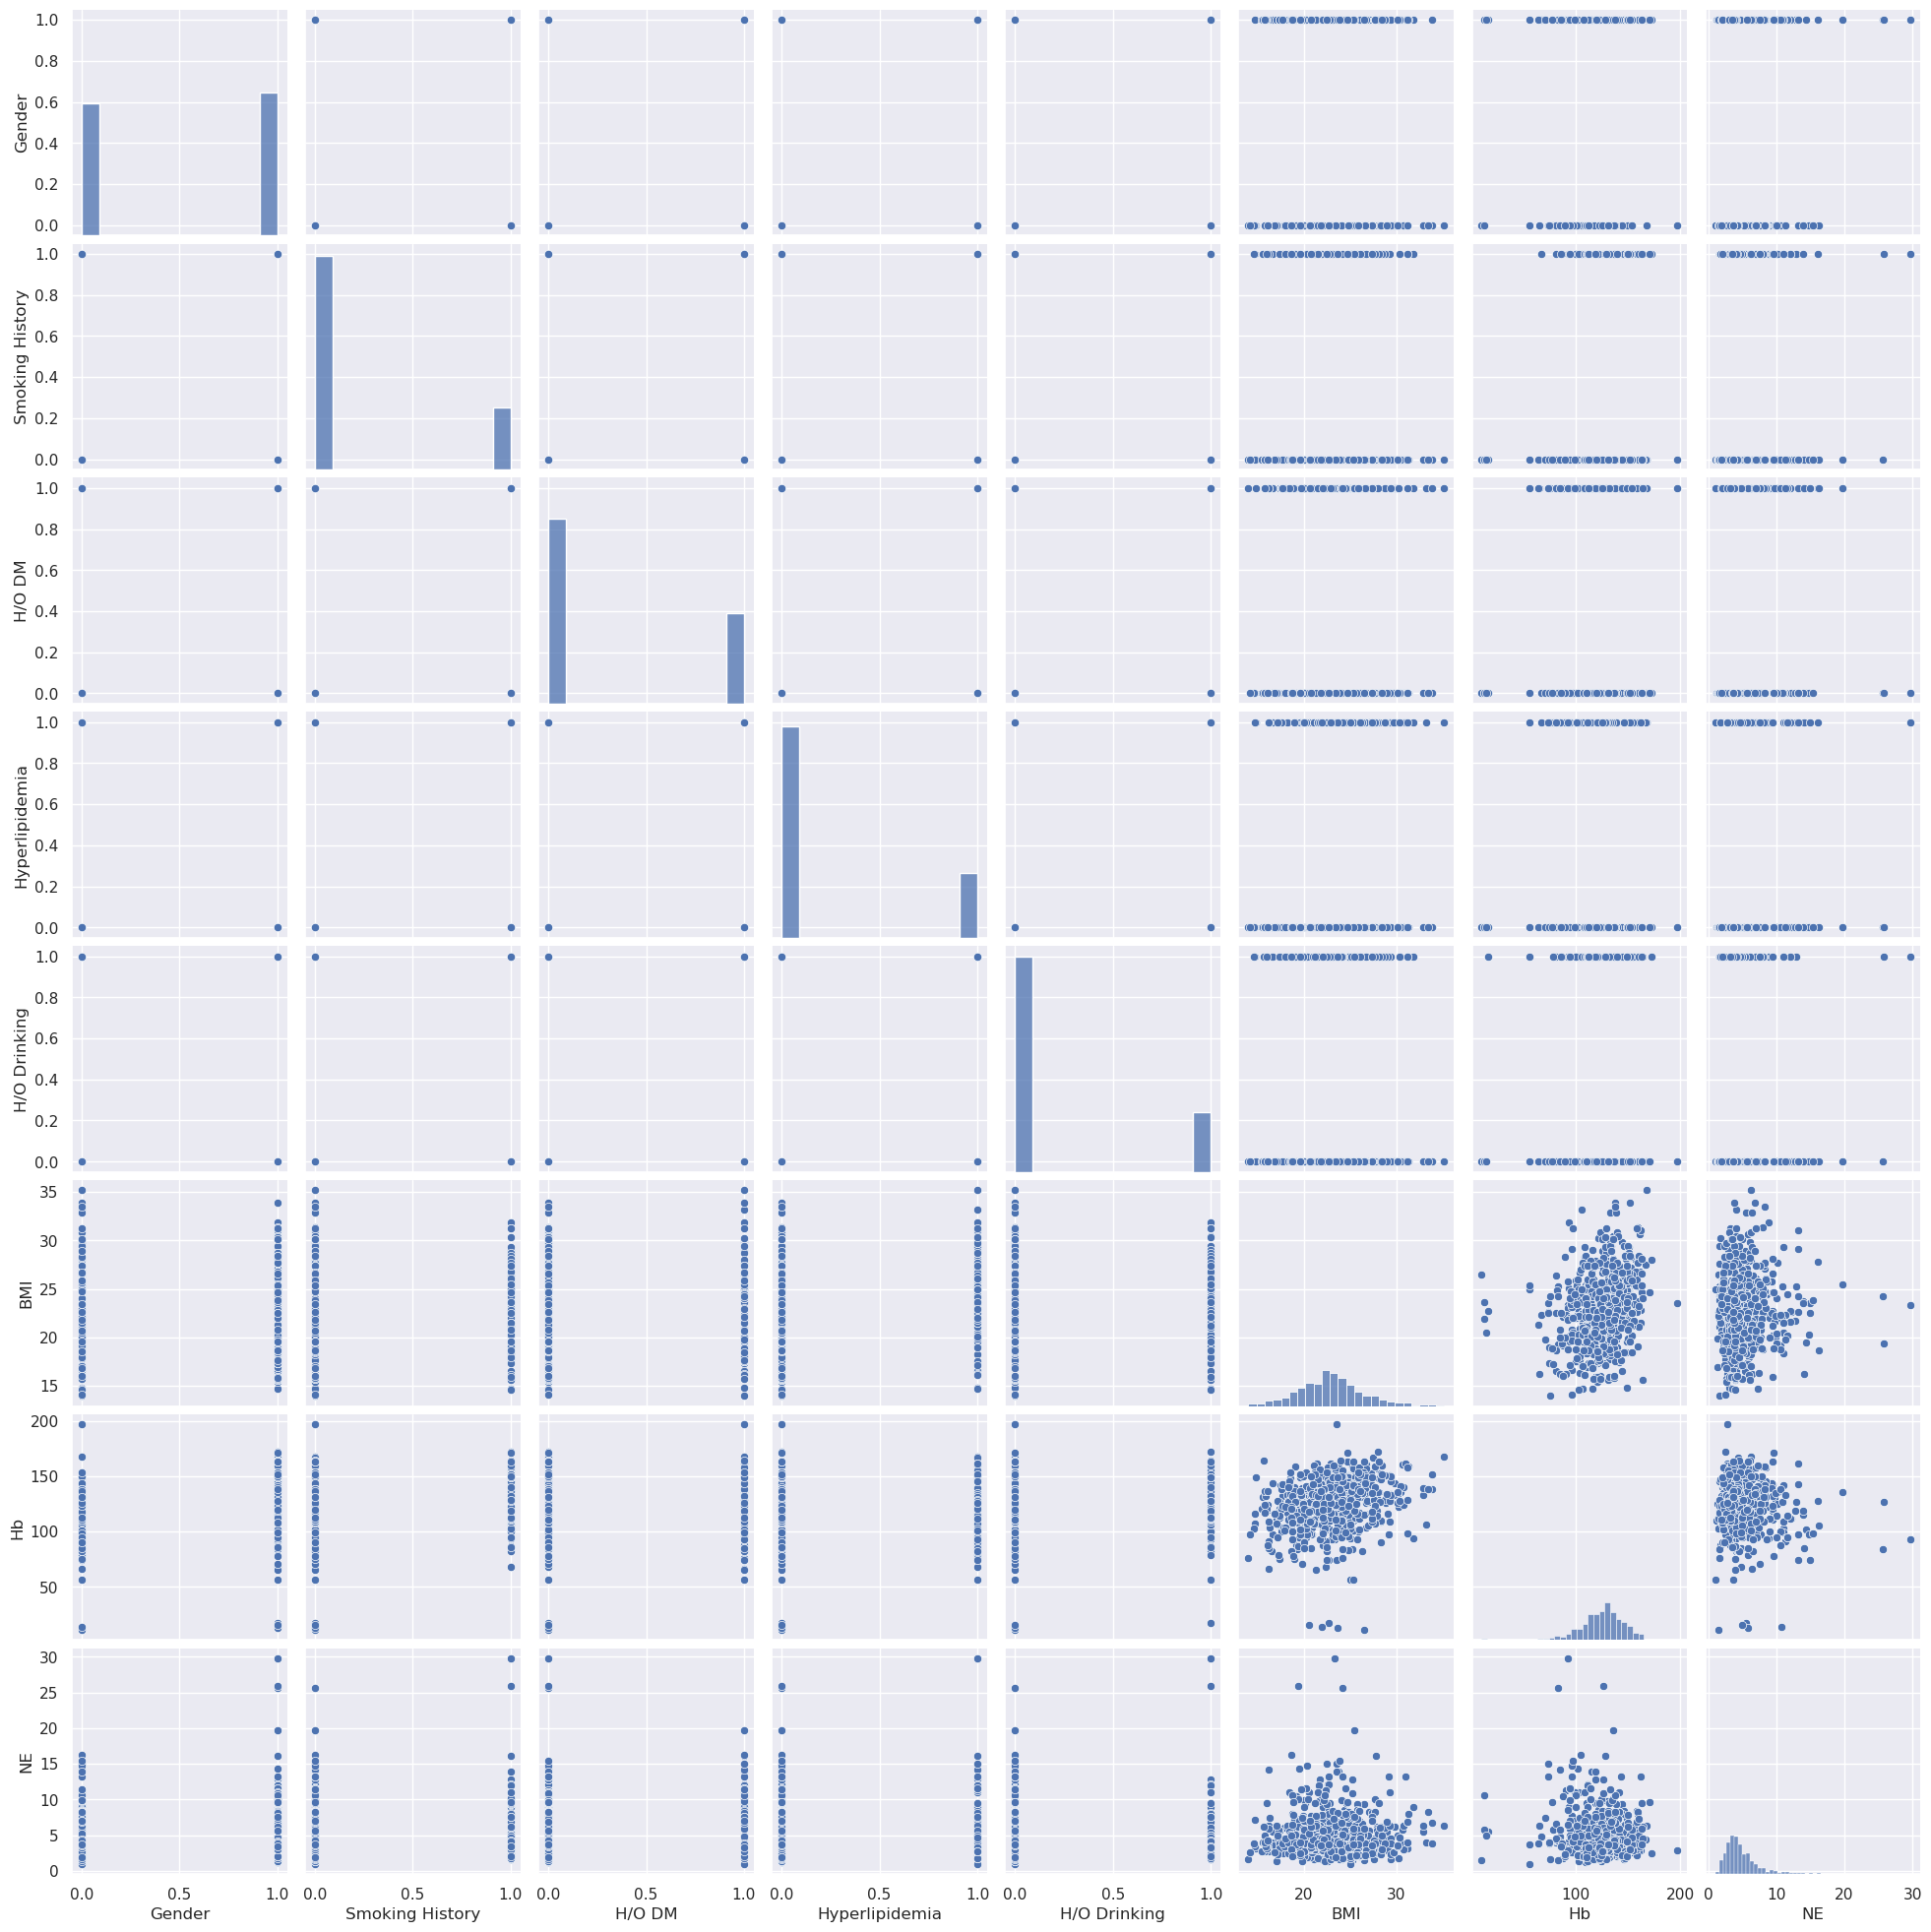

In [21]:
#pair plotinplotting 
#!apt-get install -y fonts-arphic-ukai
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font = fm.FontProperties(fname='/usr/share/fonts/truetype/arphic-ukai/ukai.ttc')  # Replace with the path to the installed Chinese font



sns.set(style="whitegrid")
sns.set_color_codes("pastel")
sns.set(font="SimSun")

plt.rcParams['font.family'] = 'AR PL UKai CN'
sns.pairplot(df.iloc[:,0:8])

In [22]:
print(len(df.columns)-1)

25


In [23]:
df.iloc[:, 25]

0      1
1      1
2      1
3      1
4      1
      ..
718    0
719    0
720    0
721    0
722    0
Name: Pancreatic Cancer, Length: 723, dtype: int64

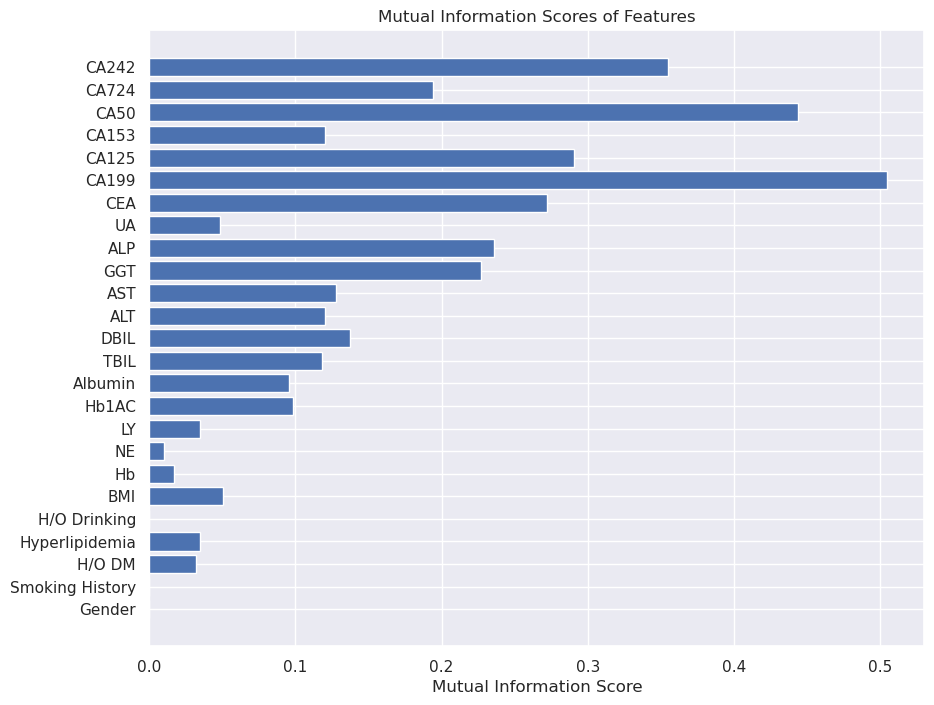

CA199              0.504965
CA50               0.443980
CA242              0.354935
CA125              0.290543
CEA                0.271819
ALP                0.235948
GGT                0.226784
CA724              0.193945
DBIL               0.137221
AST                0.127943
CA153              0.120029
ALT                0.119858
TBIL               0.118203
Hb1AC              0.098560
Albumin            0.095616
BMI                0.050167
UA                 0.048678
Hyperlipidemia     0.034566
LY                 0.034486
H/O DM             0.031795
Hb                 0.017184
NE                 0.010026
Smoking History    0.000000
H/O Drinking       0.000000
Gender             0.000000
dtype: float64


In [24]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Assuming 'Pancreatic Cancer' as my target variable
X = df.drop('Pancreatic Cancer', axis=1)
y = df['Pancreatic Cancer']

# Calculate mutual information
mi = mutual_info_classif(X, y)

# Get feature names and corresponding MI scores
feature_mi = pd.Series(mi, index=X.columns)
sorted_features = feature_mi.sort_values(ascending=False)
# Plot the MI scores
plt.figure(figsize=(10, 8))
plt.barh(feature_mi.index, feature_mi.values)
plt.xlabel('Mutual Information Score')
plt.title('Mutual Information Scores of Features')
plt.show()
print(sorted_features)


In [25]:
# Get the top 25 features
top_25_features = sorted_features[:25]

# Get the column names of the top 30 features
top_25_feature_names = top_25_features.index.tolist()

# Now you can use these top 25 features in your training
new_df= df[top_25_feature_names]
#y_train = df['Pancreatic Cancer']



In [26]:
new_df.columns

Index(['CA199', 'CA50', 'CA242', 'CA125', 'CEA', 'ALP', 'GGT', 'CA724', 'DBIL',
       'AST', 'CA153', 'ALT', 'TBIL', 'Hb1AC', 'Albumin', 'BMI', 'UA',
       'Hyperlipidemia', 'LY', 'H/O DM', 'Hb', 'NE', 'Smoking History',
       'H/O Drinking', 'Gender'],
      dtype='object')

In [27]:
#Split the data into independent 'X' and dependent 'Y' variables
X = df.iloc[:, [col for col in range(len(df.columns)) if col != 25]].values 
Y = df.iloc[:, 25].values #Get the target variable 'diagnosis' located at index=25


In [28]:
#Split the data into independent 'X' and dependent 'Y' variables
X = new_df 
Y = df['Pancreatic Cancer']

In [29]:
# Split the dataset into 75% Training set and 25% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


In [30]:
# Scale the data to bring all features to the same level of magnitude
# This means the data will be within a specific range for example 0 -100 or 0 - 1

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [31]:
X_test





array([[-0.60133842, -0.67204547, -0.63540275, ..., -0.5466959 ,
        -0.54402585, -1.01393795],
       [-0.57947465, -0.64819484, -0.60187843, ...,  1.82917048,
         1.83814795,  0.98625364],
       [-0.58311861, -0.63511884, -0.5806191 , ..., -0.5466959 ,
        -0.54402585, -1.01393795],
       ...,
       [ 1.58942866,  0.14792463,  2.08170287, ..., -0.5466959 ,
        -0.54402585,  0.98625364],
       [ 0.12218546,  0.28234596,  0.35874338, ..., -0.5466959 ,
        -0.54402585, -1.01393795],
       [ 1.58942866,  1.93881425,  0.68022257, ..., -0.5466959 ,
        -0.54402585, -1.01393795]])

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
# Assume that df is your DataFrame and "target" is your target column

# Create a function within many Machine Learning Models
def models(X_train,Y_train,feature_names):

 # Using Logistic Regression Algorithm to the Training Set
 log = LogisticRegression(random_state = 0)
 log.fit(X_train, Y_train)

 # Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
 knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
 knn.fit(X_train, Y_train)

 # Using SVC method of svm class to use Support Vector Machine Algorithm
 svc_lin = SVC(kernel = 'linear', random_state = 0, probability=True)
 svc_lin.fit(X_train, Y_train)

 # Using SVC method of svm class to use Kernel SVM Algorithm
 svc_rbf = SVC(kernel = 'rbf', random_state = 0, probability=True)
 svc_rbf.fit(X_train, Y_train)

 # Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
 gauss = GaussianNB()
 gauss.fit(X_train, Y_train)

 # Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
 tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
 tree.fit(X_train, Y_train)

 # Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
 forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
 forest.fit(X_train, Y_train)

 # Create an artificial neural network model
 ann_model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000)
 ann_model.fit(X_train, Y_train)

 # Make predictions using the ANN model
 ann_predictions = ann_model.predict(X_test)
 # Evaluate the ANN model
 ann_accuracy = accuracy_score(Y_test, ann_predictions)

 # Print model accuracy on the training data.
 print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
 print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
 print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
 print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
 print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
 print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
 print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
 print('[7] Artificial Neural Network Accuracy:', ann_accuracy)

 model_list = [log, knn, svc_lin, svc_rbf, gauss, tree, forest, ann_model] # List of your models
 model_names = ['Logistic Regression', 'K Nearest Neighbors', 'SVC Linear', 'SVC RBF', 'Gaussian NB', 'Decision Tree', 'Random Forest', 'Artificial Neural Network'] # Names of your models

 # Plot ROC curve for each model
 # Plot ROC curve for each model
 for i, model in enumerate(model_list):
    plt.figure(figsize=(8,6)) # Create a new figure for each model
    probas = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(Y_test, probas[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='AUC = %0.2f' % (roc_auc))
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve of %s' % (model_names[i]))
    plt.legend(loc="lower right")
    plt.show()



   # Plot feature importance for each model
    # Plot feature importance for each model
#     for i, model in enumerate(model_list):
#         try:
#             importance = model.feature_importances_
#             plt.figure(figsize=(10, 8))
#             plt.barh(range(importance.shape[0]), importance, align='center')
#             plt.yticks(np.arange(importance.shape[0]))
#             plt.xlabel('Feature Importance')
#             plt.title('Feature importance of %s' % (model_names[i]))
#             plt.show()
#         except AttributeError:
#             print(f'{model_names[i]} has no feature_importances_ attribute')
            
 for i, model in enumerate(model_list):
     try:
         # For tree-based models
         if hasattr(model, 'feature_importances_'):
             plt.figure(figsize=(8, 10))
             plt.barh(range(len(model.feature_importances_)), model.feature_importances_, align='center')
             plt.yticks(range(len(model.feature_importances_)), feature_names,  ha='right', rotation_mode='anchor')
             plt.xlabel('Feature Importance')
             plt.title('Feature importance of %s' % (model_names[i]))
             plt.show()
         # For linear models
         elif hasattr(model, 'coef_'):
             plt.figure(figsize=(8, 10))
             plt.barh(range(len(model.coef_[0])), model.coef_[0].flatten(), align='center')
             plt.yticks(range(len(model.coef_[0])), feature_names, ha='right', rotation_mode='anchor')
             plt.xlabel('Feature Importance')
             plt.title('Feature importance of %s' % (model_names[i]))
             plt.show()
             # For MLPClassifier
         elif isinstance(model, MLPClassifier):
            continue
         else:
             print(f'No feature scores available for {model_names[i]}')
     except AttributeError:
         print(f'{model_names[i]} has no feature_importances_ attribute')

 




 return log, knn, svc_lin, svc_rbf, gauss, tree, forest, ann_model


In [33]:
dff = df.iloc[:, :-1]


[0]Logistic Regression Training Accuracy: 0.916955017301038
[1]K Nearest Neighbor Training Accuracy: 0.8910034602076125
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9359861591695502
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9307958477508651
[4]Gaussian Naive Bayes Training Accuracy: 0.856401384083045
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9965397923875432
[7] Artificial Neural Network Accuracy: 0.9241379310344827


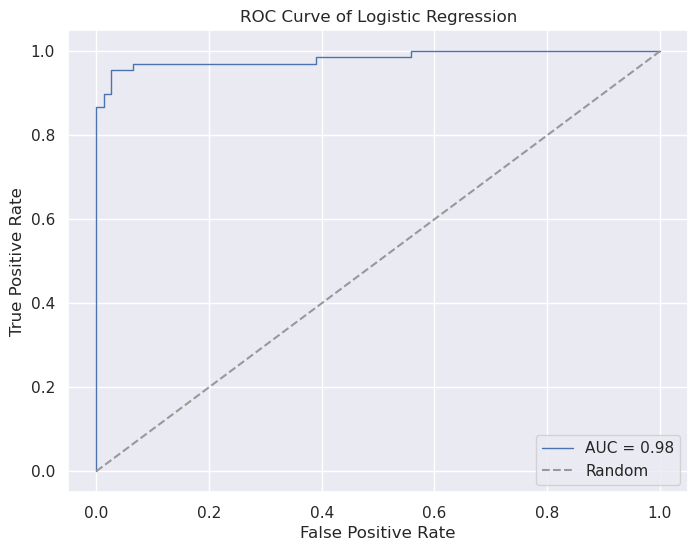

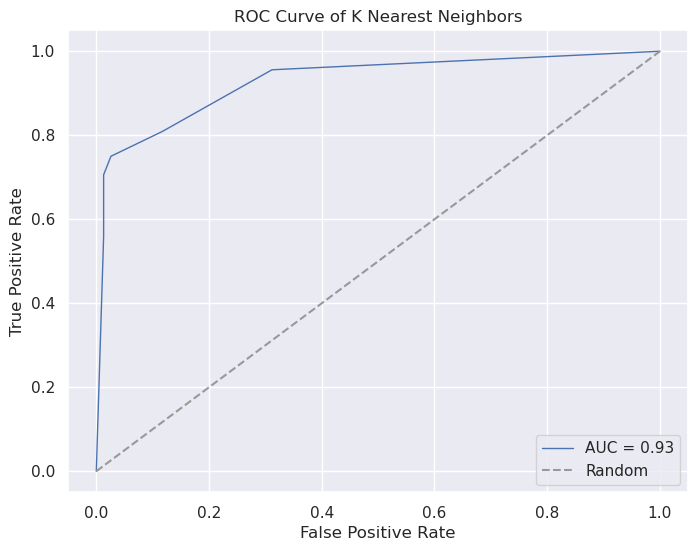

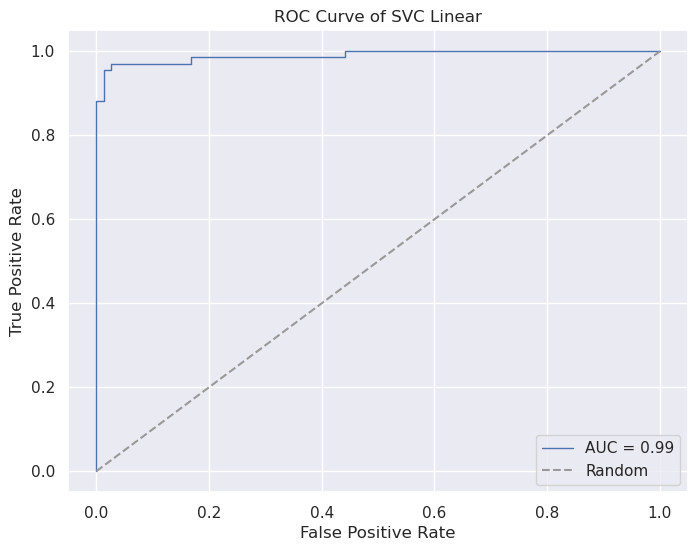

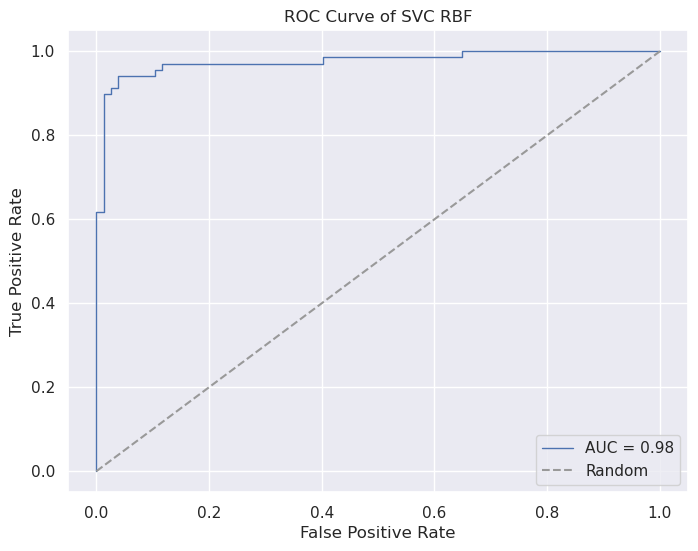

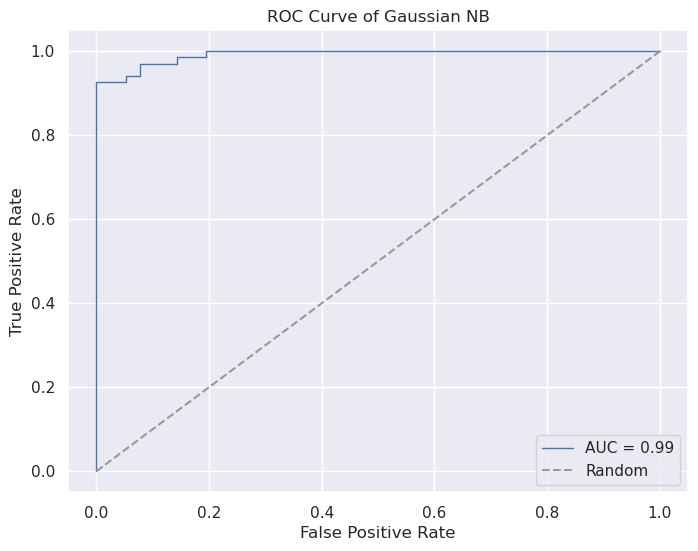

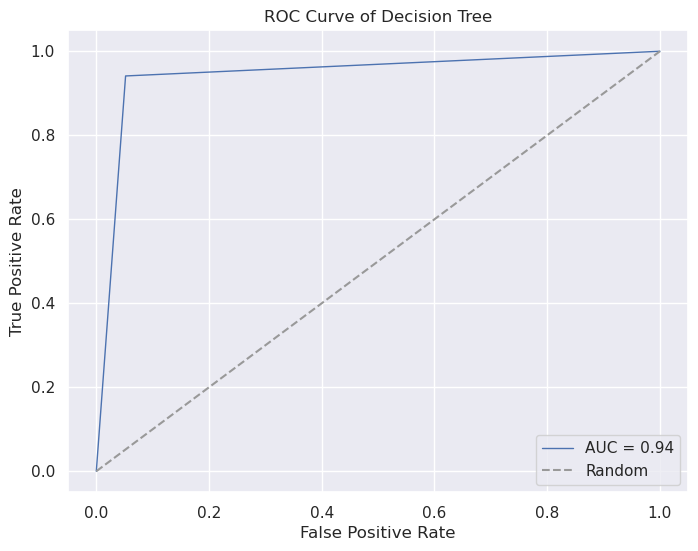

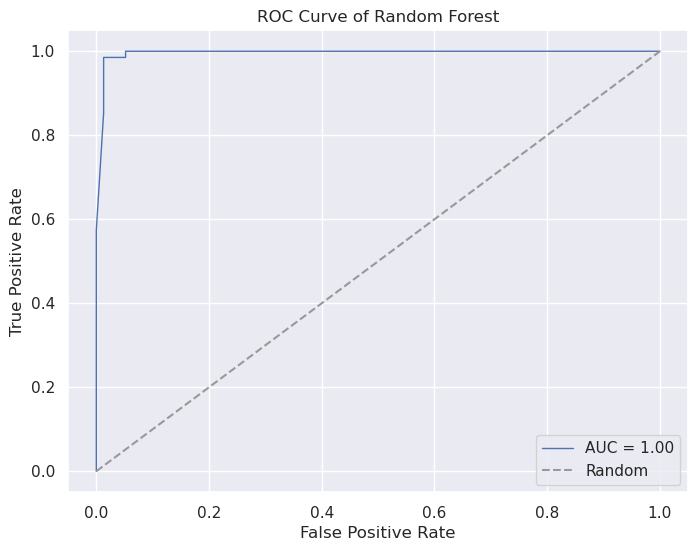

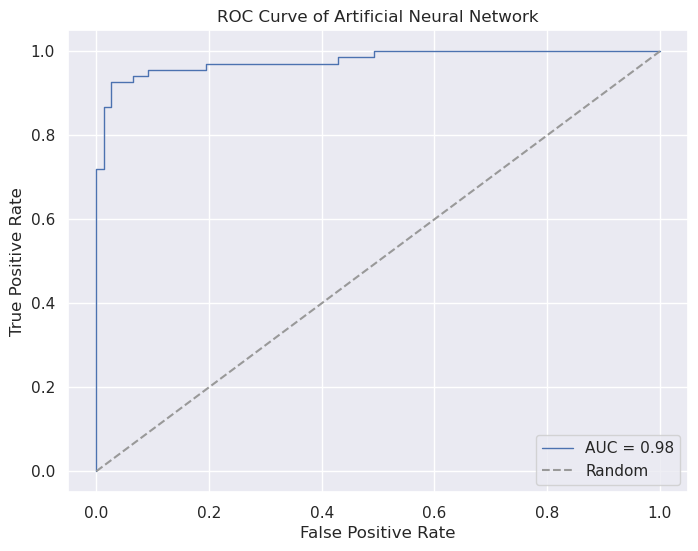

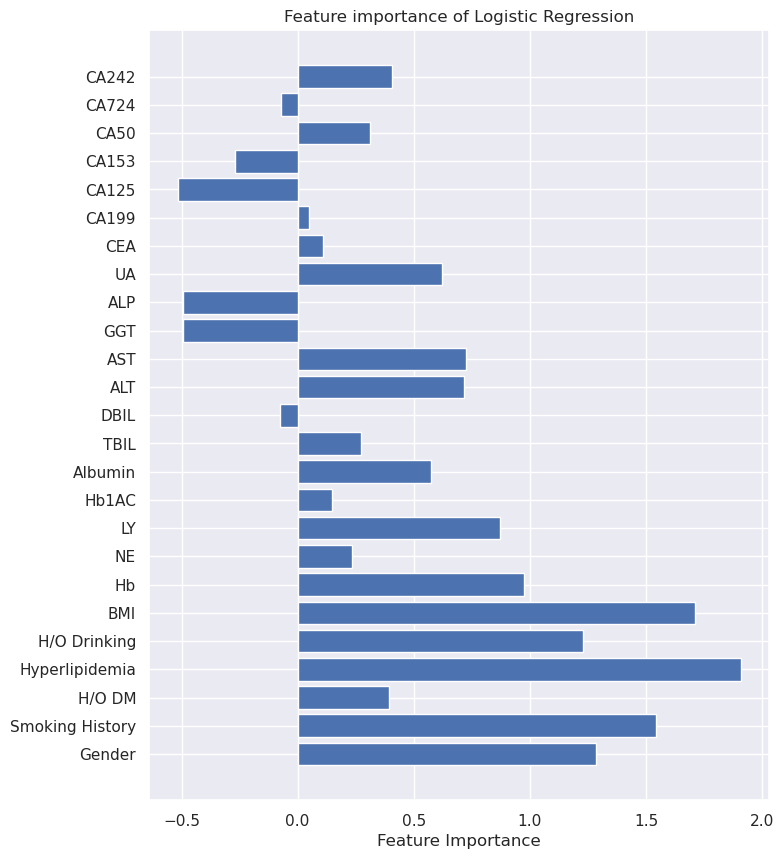

No feature scores available for K Nearest Neighbors


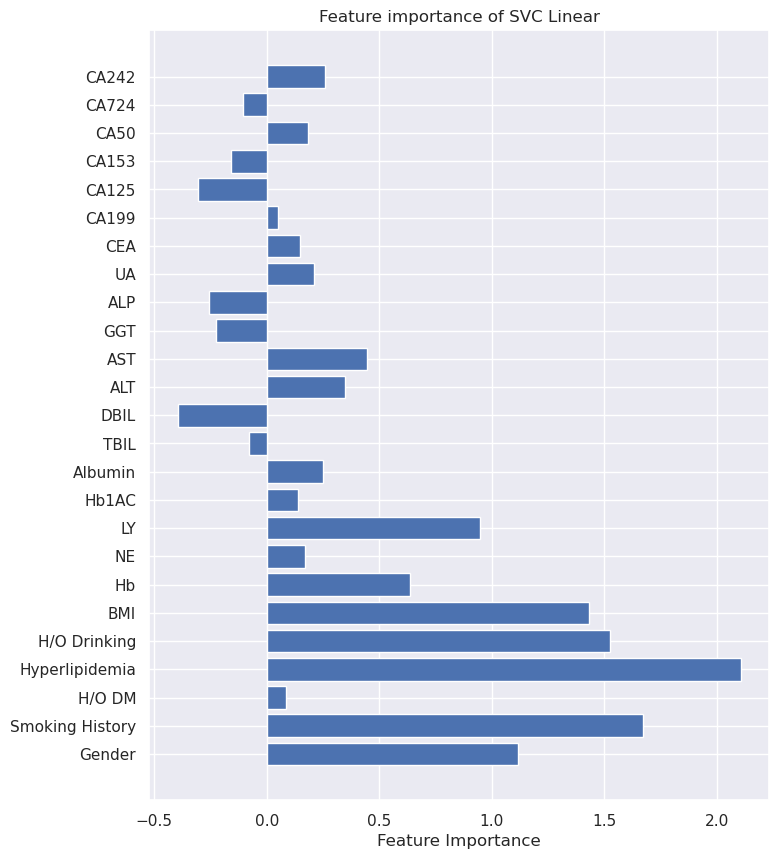

No feature scores available for SVC RBF
No feature scores available for Gaussian NB


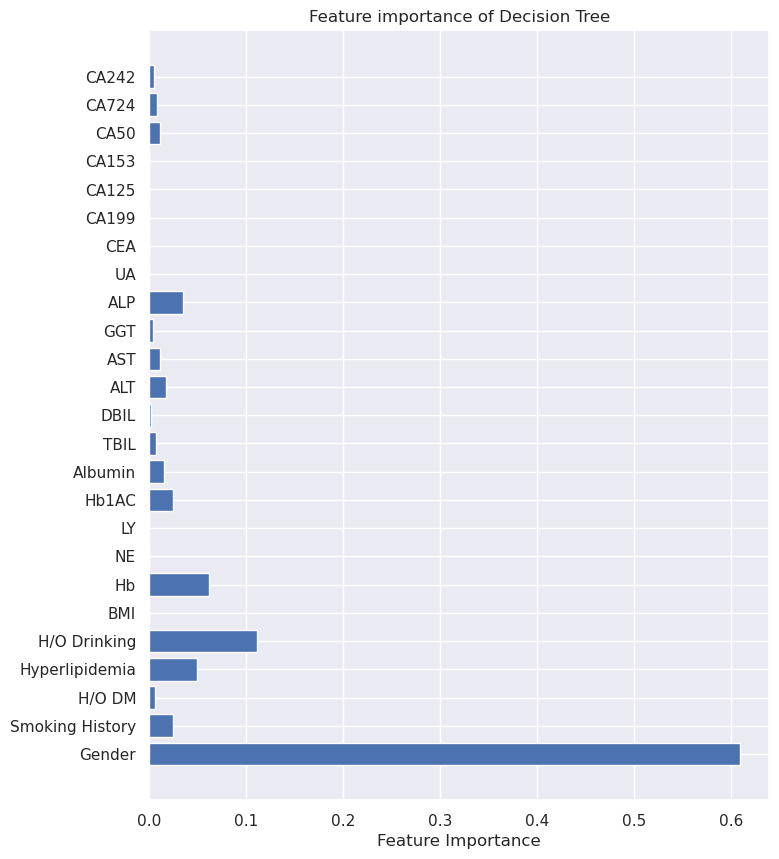

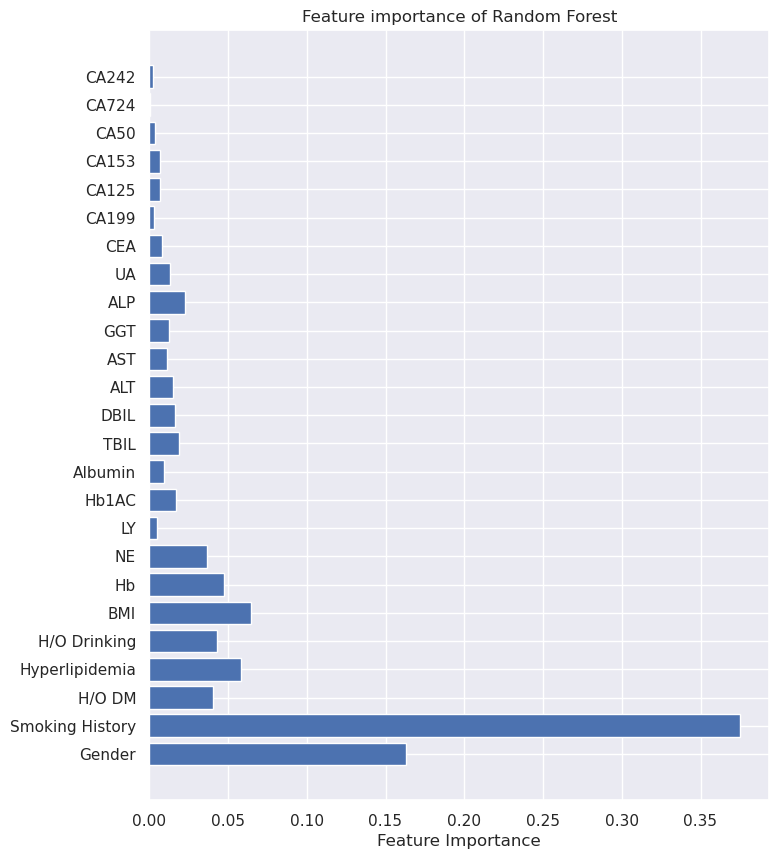

In [34]:
model = models(X_train,Y_train,dff.columns)

In [35]:
X_train.shape



(578, 25)

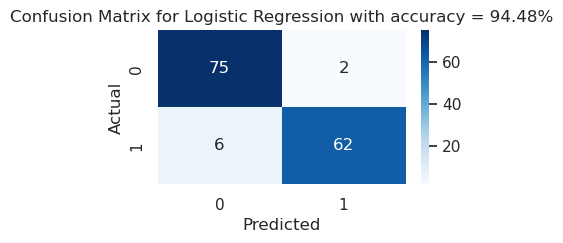

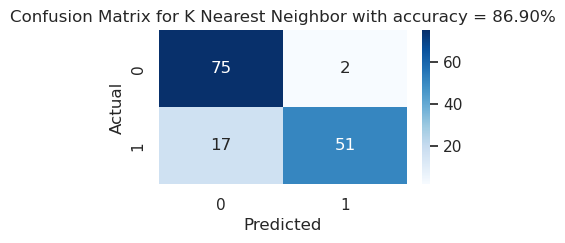

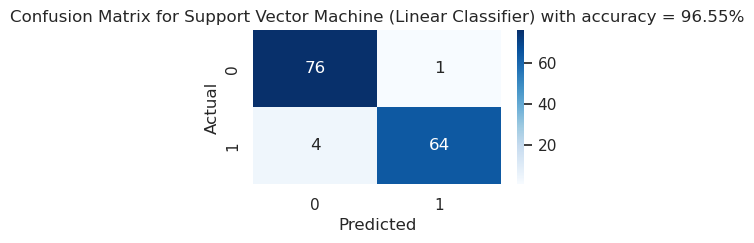

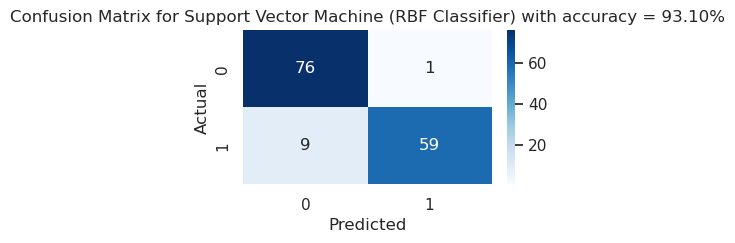

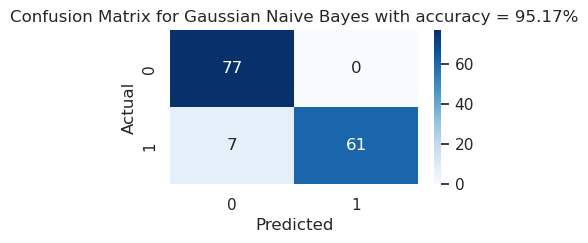

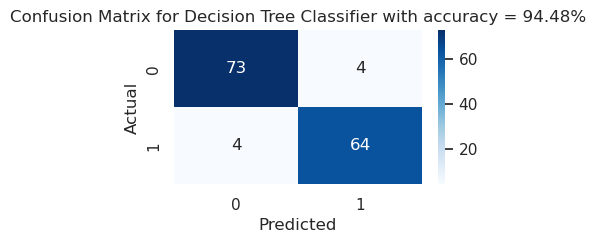

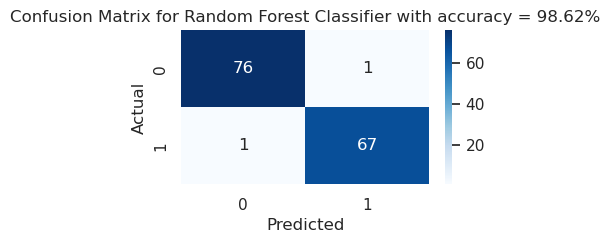

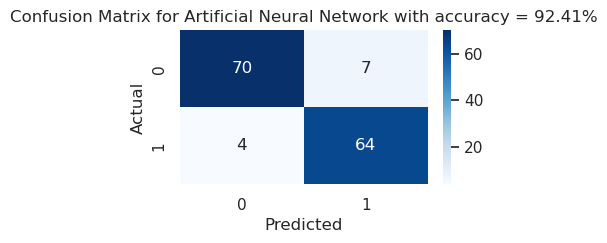

In [36]:
#Show the confusion matrix and accuracy for all of the models on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model_names = [
    "Logistic Regression",
    "K Nearest Neighbor",
    "Support Vector Machine (Linear Classifier)",
    "Support Vector Machine (RBF Classifier)",
    "Gaussian Naive Bayes",
    "Decision Tree Classifier",
    "Random Forest Classifier",
    "Artificial Neural Network"
]

# Assuming model is a list of trained models
# and X_test, Y_test are your test dataset
for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))

    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]

    accuracy = (TP + TN) / (TP + TN + FN + FP)

    plt.figure(figsize=(4,2))
    sns.heatmap(cm, annot=True, cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for {} with accuracy = {:.2f}%'.format(model_names[i], accuracy*100))
    plt.show()



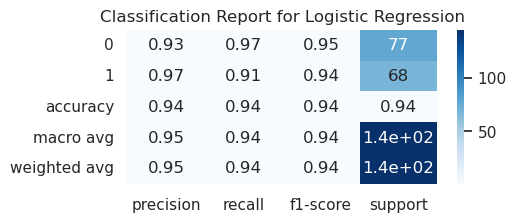

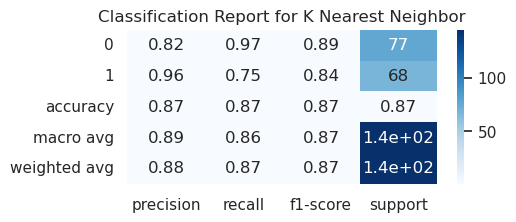

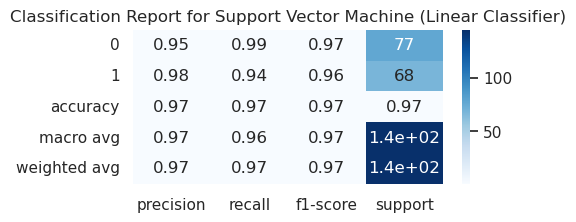

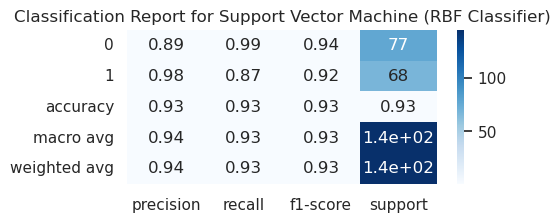

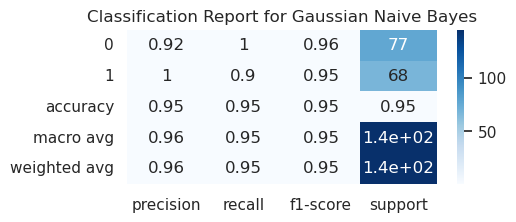

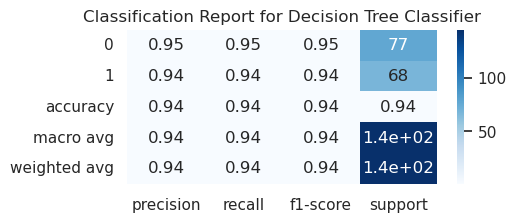

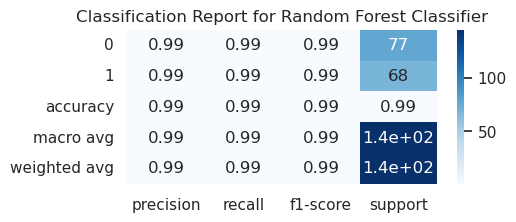

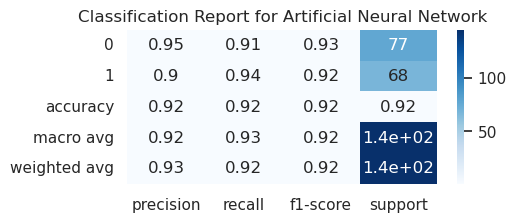

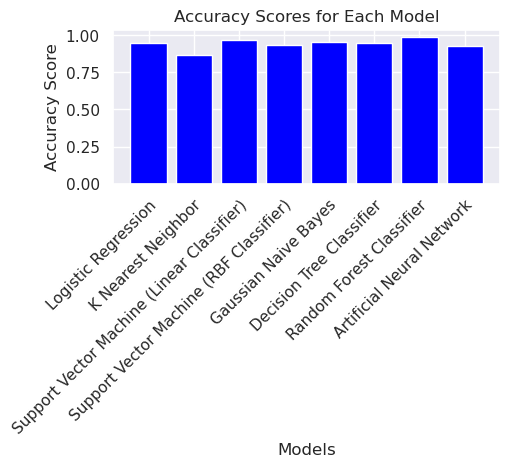

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

model_names = [
 "Logistic Regression",
 "K Nearest Neighbor",
 "Support Vector Machine (Linear Classifier)",
 "Support Vector Machine (RBF Classifier)",
 "Gaussian Naive Bayes",
 "Decision Tree Classifier",
 "Random Forest Classifier",
 "Artificial Neural Network"
]

# Initialize lists to store the results
report_list = []
accuracy_list = []

for i in range(len(model)):
  # Check precision, recall, f1-score
  report = classification_report(Y_test, model[i].predict(X_test), output_dict=True)
  report_list.append(report)
  
  # Another way to get the models accuracy on the test data
  accuracy = accuracy_score(Y_test, model[i].predict(X_test))
  accuracy_list.append(accuracy)

# Convert the classification reports to dataframes and plot them using seaborn
for i in range(len(report_list)):
  report_df = pd.DataFrame(report_list[i]).transpose()
  plt.figure(figsize=(5, 2))
  sns.heatmap(report_df, annot=True, cmap='Blues')
  plt.title(f'Classification Report for {model_names[i]}')
 
  plt.show()

# Plot accuracy scores
plt.figure(figsize=(5, 2))
plt.bar(range(len(accuracy_list)), accuracy_list, color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Each Model')
plt.xticks(range(len(accuracy_list)), model_names,rotation=45, ha='right', rotation_mode='anchor')
plt.show()


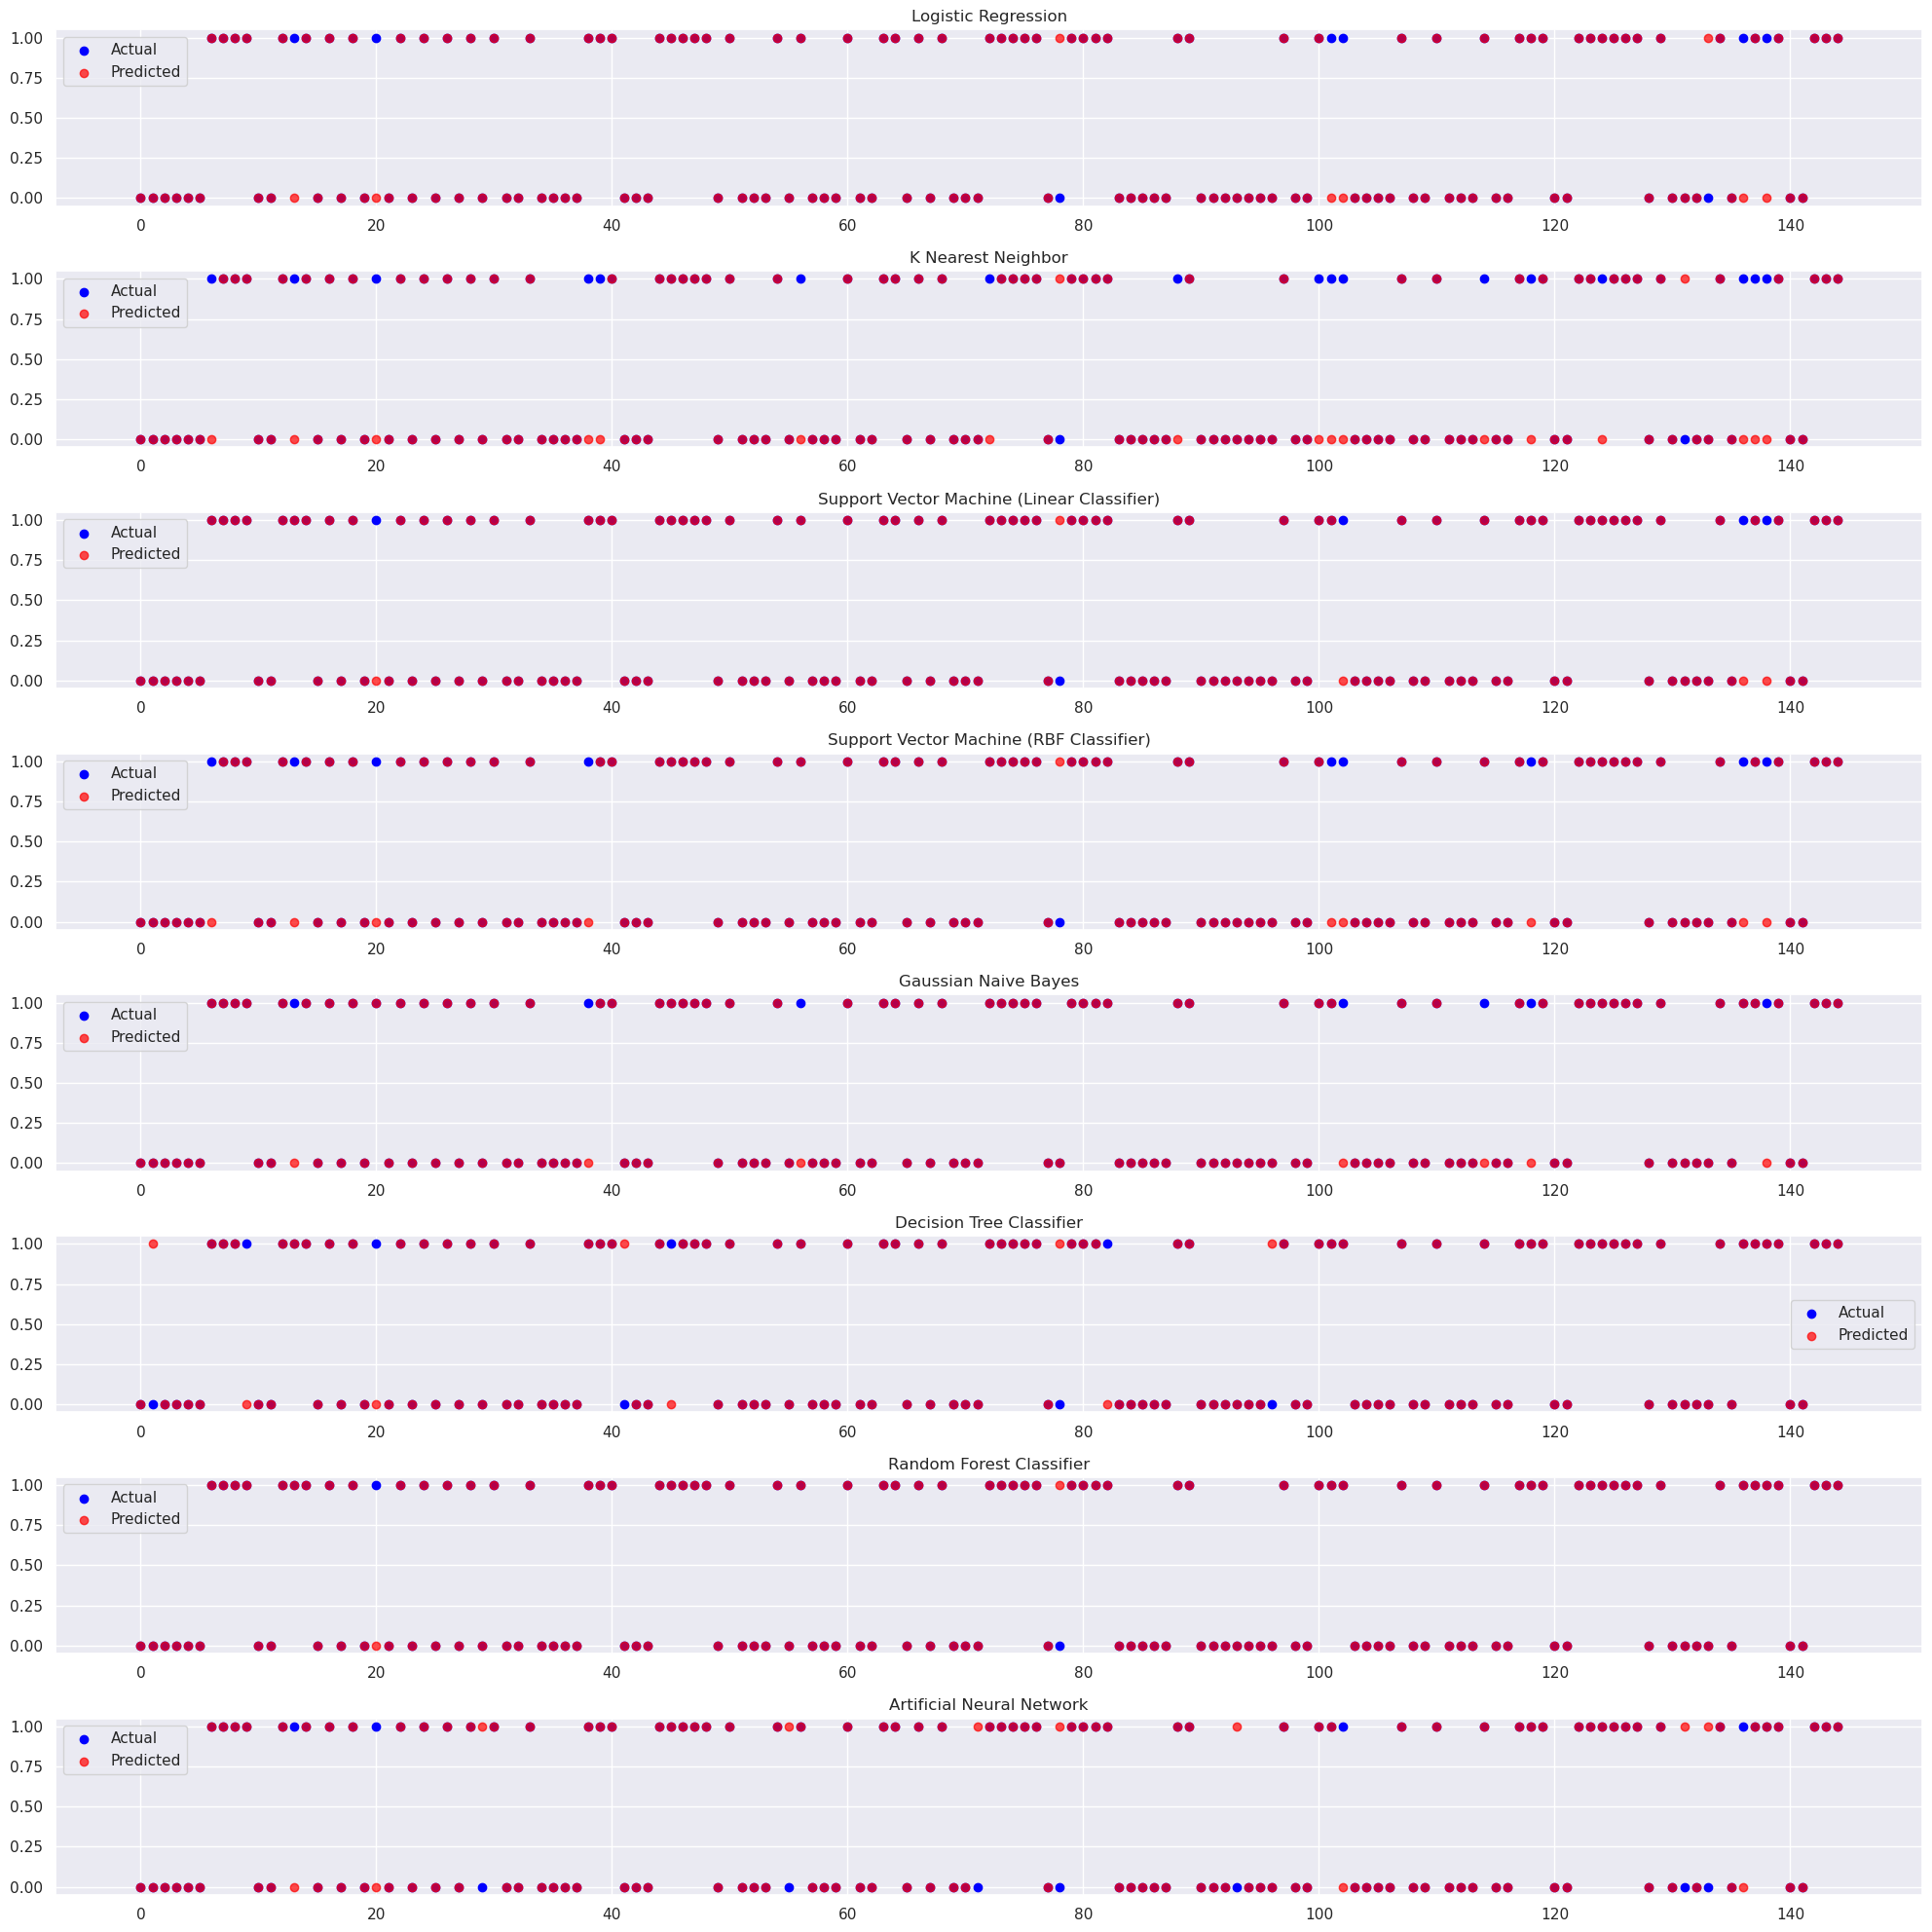

In [38]:
import matplotlib.pyplot as plt

# Initialize the figure
plt.figure(figsize=(20, 20))

# Define the number of subplots
n = len(model)

# Loop over the models
for i in range(n):
  # Get predictions
  pred = model[i].predict(X_test)
  
  # Add a subplot for this prediction
  plt.subplot(n, 1, i+1)
  
  # Plot the predictions and actual values
  plt.scatter(range(len(Y_test)), Y_test, color='blue', label='Actual')
  plt.scatter(range(len(pred)), pred, color='red', alpha=0.7, label='Predicted')
  
  # Add a title
  plt.title(model_names[i])
  
  # Add a legend
  plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
